In [72]:
import numpy as np
import pandas as pd

In [73]:
DF = pd.read_csv('data.csv')
DF1 = DF.copy()
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [74]:
from sklearn.impute import SimpleImputer

In [75]:
x = DF1[['Age', 'Salary']].values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
DF1[['Age', 'Salary']] = imputer.fit_transform(x)
DF1

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [76]:
DF1.groupby('Country', sort=False)['Salary'].max()

Country
France     79000.0
Spain      61000.0
Germany    83000.0
Name: Salary, dtype: float64

In [77]:
########################################################
import matplotlib.pyplot as plt

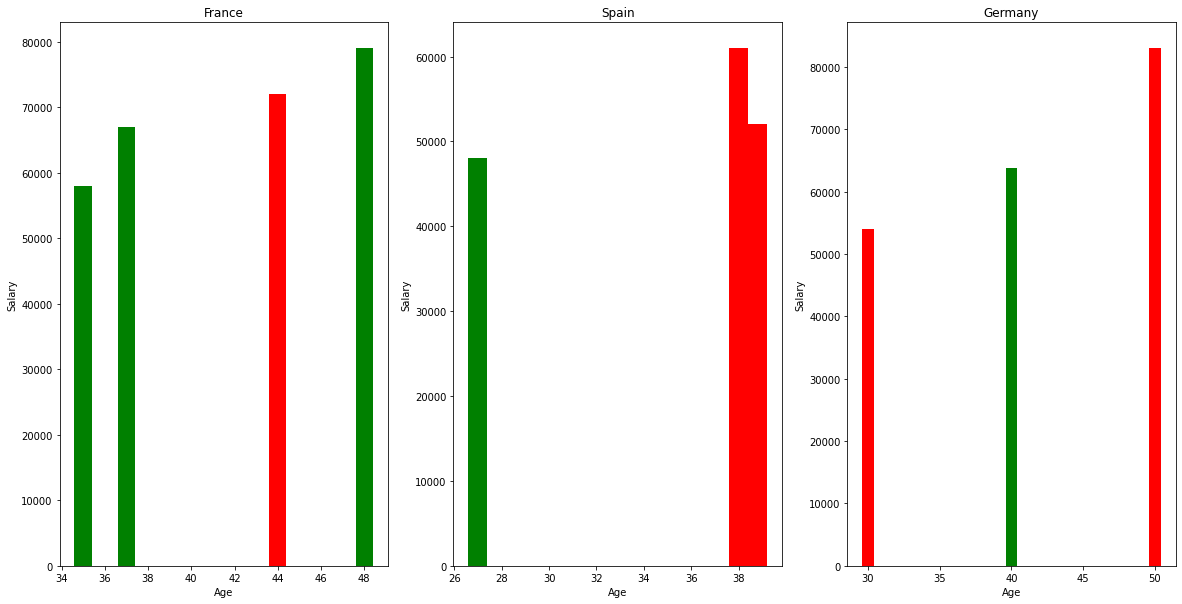

In [118]:
fig , ax = plt.subplots(nrows=1, ncols=DF1['Country'].value_counts().size, figsize=(20,10))

for index, data in enumerate(DF1.groupby('Country', sort=False)):
    country, datafr = data
    datafr.sort_values('Age')
    for _, row in datafr.iterrows():
        ax[index].bar(row[1], row[2], color='g' if row[3]=='Yes' else 'r')
        ax[index].set(title=country, xlabel='Age', ylabel='Salary')
    